<a href="https://colab.research.google.com/github/Mira5678/IBM-EDA-for-ML-project/blob/main/IBM_EDA_with_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IBM Exploratory Data Analysis with Machine Learning Final Project**

For this final project, I would like to find out how does being a smoker versus a non-smoker affect insurance charges and their quality of life.

“This project investigates how smoking status influences an individual’s insurance charges and examines whether smokers incur significantly higher costs compared to non-smokers.”

##**Dataset Summary**

For this project, I will use <code>insurance.csv</code> file, hosted on IBM Cloud object.

This dataset contains information about age, sex, BMI, the number of children, whether the client is smoker or non-smoker, region where the client lives, and the charges to their insurance company.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##**Data Exploration Plan**

###**Research Purpose**

This Research focuses on how smoking influences insurance charges. This includes exploring:

- The relationship between smoking and insurance costs

- Whether smokers pay significantly higher charges

- How other variables (such as age, BMI, children, region, sex) correlate with smoking status and charges

###**Plan**
Data Exploration:
1. Plot smoker vs. charges to get an overview using either a histogram or boxplot.
2. Plot smoker vs. each features (such as age, BMI, sex, etc.)to get the distribution and understand the relationships between each features. Also to detect outliers and check skewness.
3. Note: (scatter plot - smoking vs. age and bmi, sex - check exercise)
(pairplot - combinations of variables)

Data Cleaning:
1. Find NULL or duplicated values and drop them
2. One-hot encoding





##**Exploratory Data Analysis (EDA)**

**Smoking Vs. Charges**

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

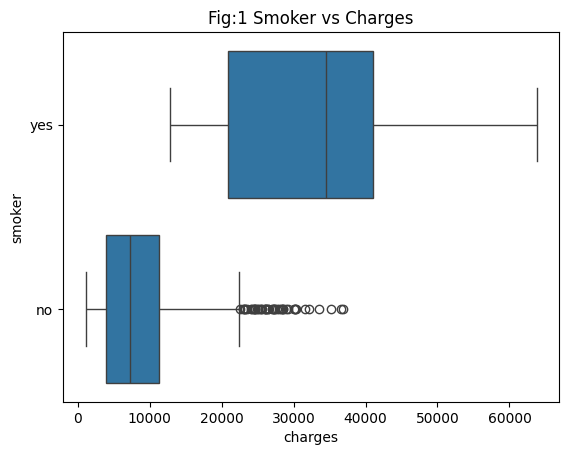

In [ ]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

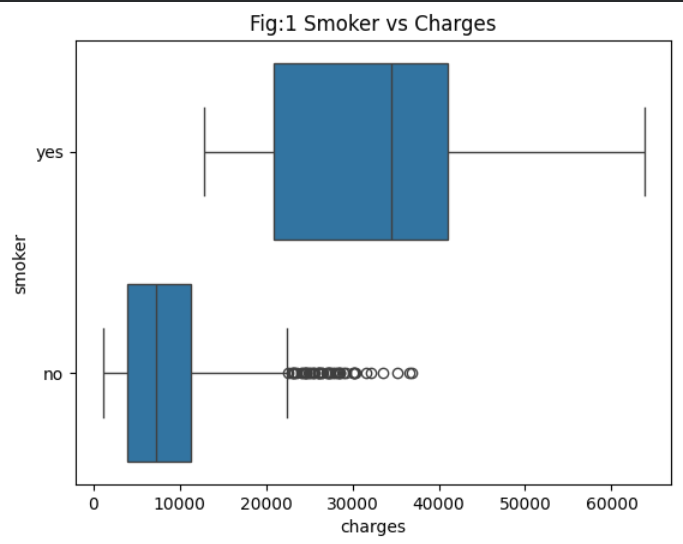

From this boxplot, we can see that non-smoker have less charges overall and smokers have more charges.

**Smoking vs. BMI**

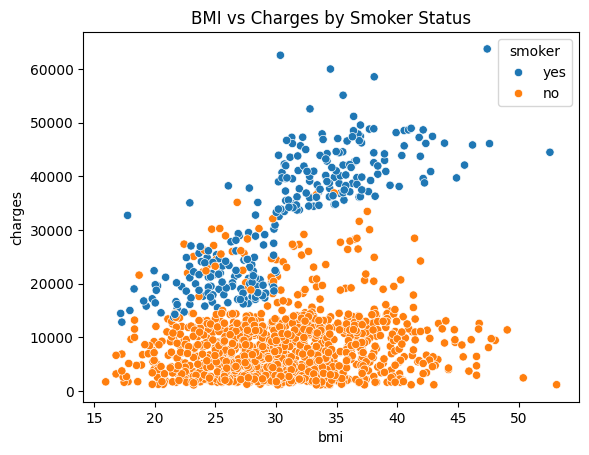

In [ ]:
sns.scatterplot(data, x='bmi', y='charges', hue='smoker')

plt.title('BMI vs Charges by Smoker Status')
plt.show()

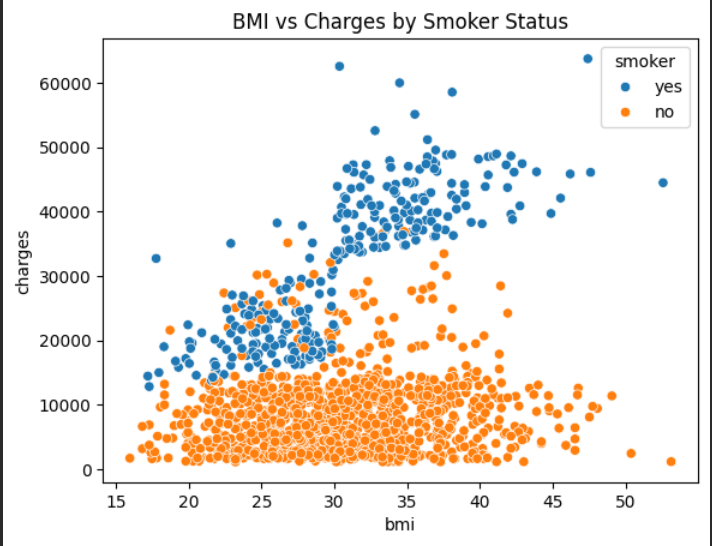

From the scatter plot, smokers with higher BMI have higher charges than Smokers with lower BMI.
Smokers with the same BMI as non-smokers also have higher charges overall than non-smoker.

**Children Vs. Charges**

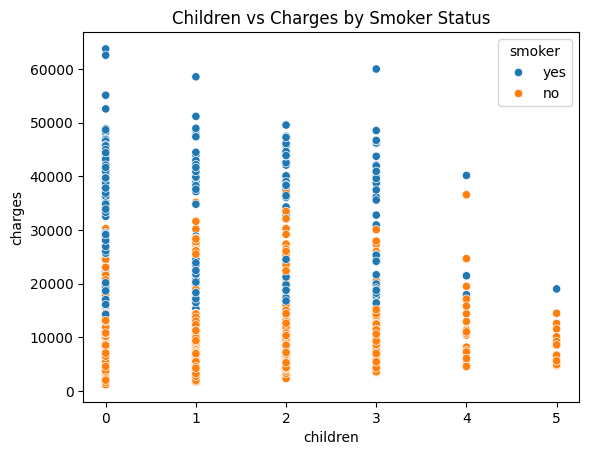

In [ ]:
sns.scatterplot(data, x='children', y='charges', hue='smoker')

plt.title('Children vs Charges by Smoker Status')
plt.show()

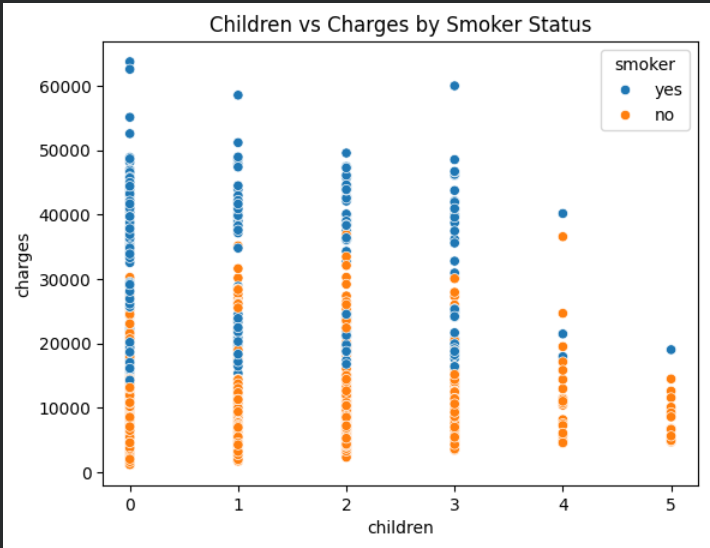

From the scatter plot, non-smokers with or without children have lower charges while smokers with or without children have higher charges. Children doesn't have a lot of affect on the charges.

**Correlation between smoker and other features (such as age, bmi, charges, children).**

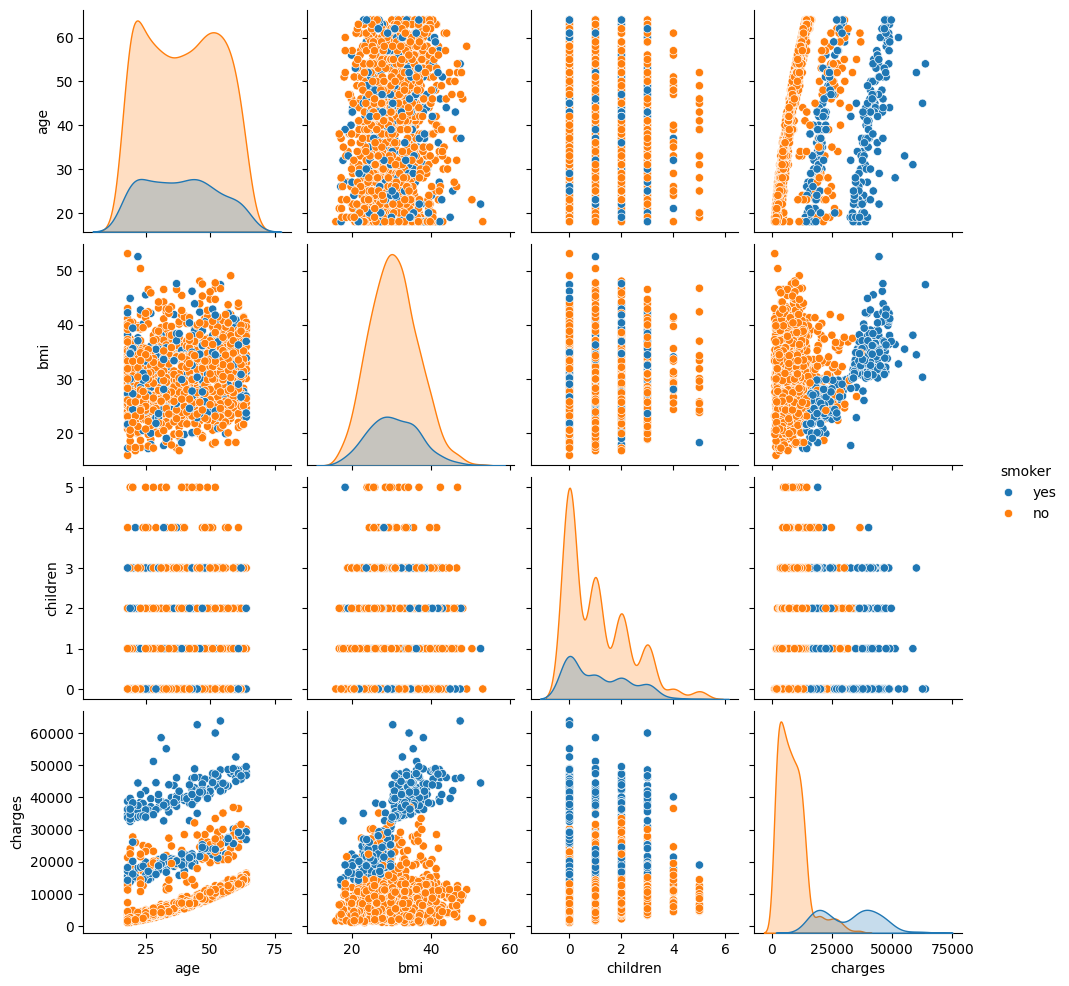

In [ ]:
sns.pairplot(data, hue='smoker');

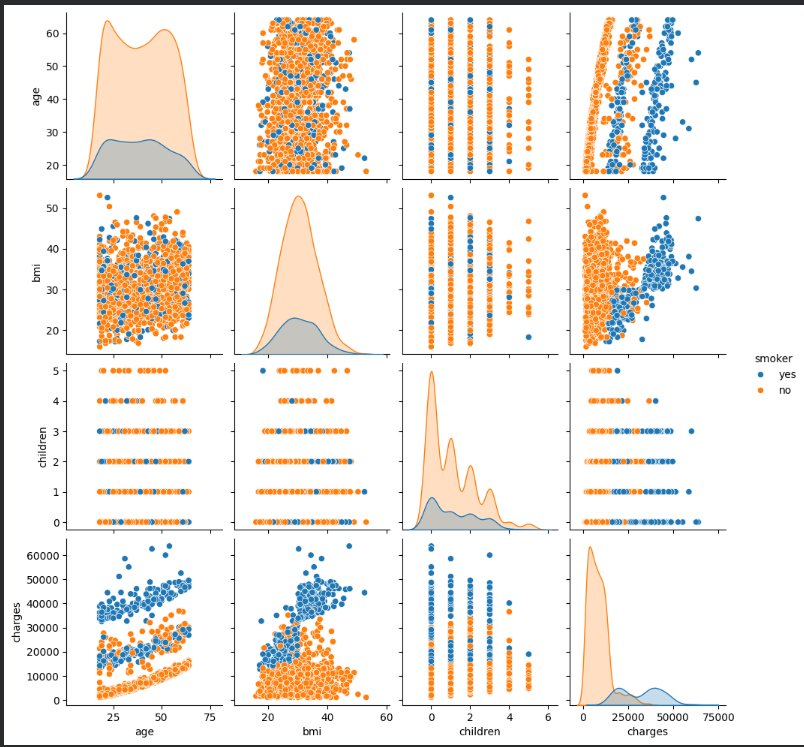

As you can see from these mulitple plots, smokers still have higher charges overall than non-smokers.

##**Data Cleaning and Feature Engineering**

**Handle Missing values**

In [5]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


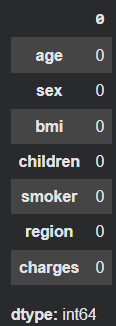

No NULL values

**Encoding**

In [6]:
new_data = pd.get_dummies(data=data, columns=['region'])

In [7]:
new_data['sex'] = new_data['sex'].map({'female': 1, 'male': 0})
new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})

In [8]:
new_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


**Detecting Outliers**

<Axes: ylabel='charges'>

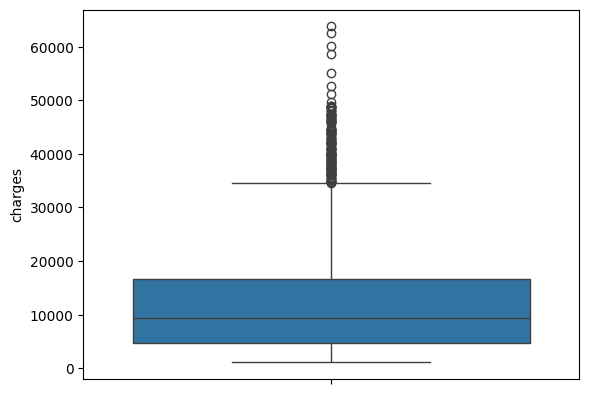

In [9]:
sns.boxplot(data['charges'])

<Axes: ylabel='bmi'>

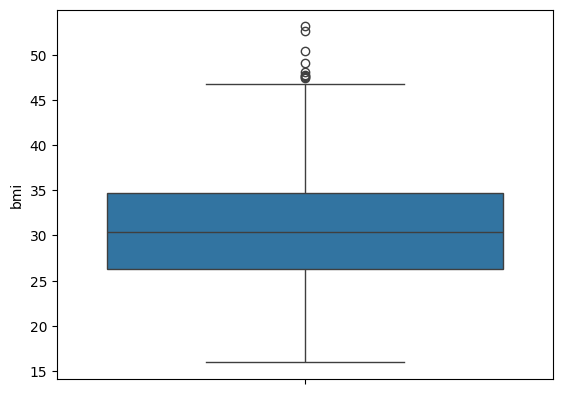

In [10]:
sns.boxplot(data['bmi'])

Outliers are not removed as high charges for smokers are expected and is needed for tests.

**Plot Heatmap to show correlation**

In [11]:
corr = new_data.corr()
corr

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


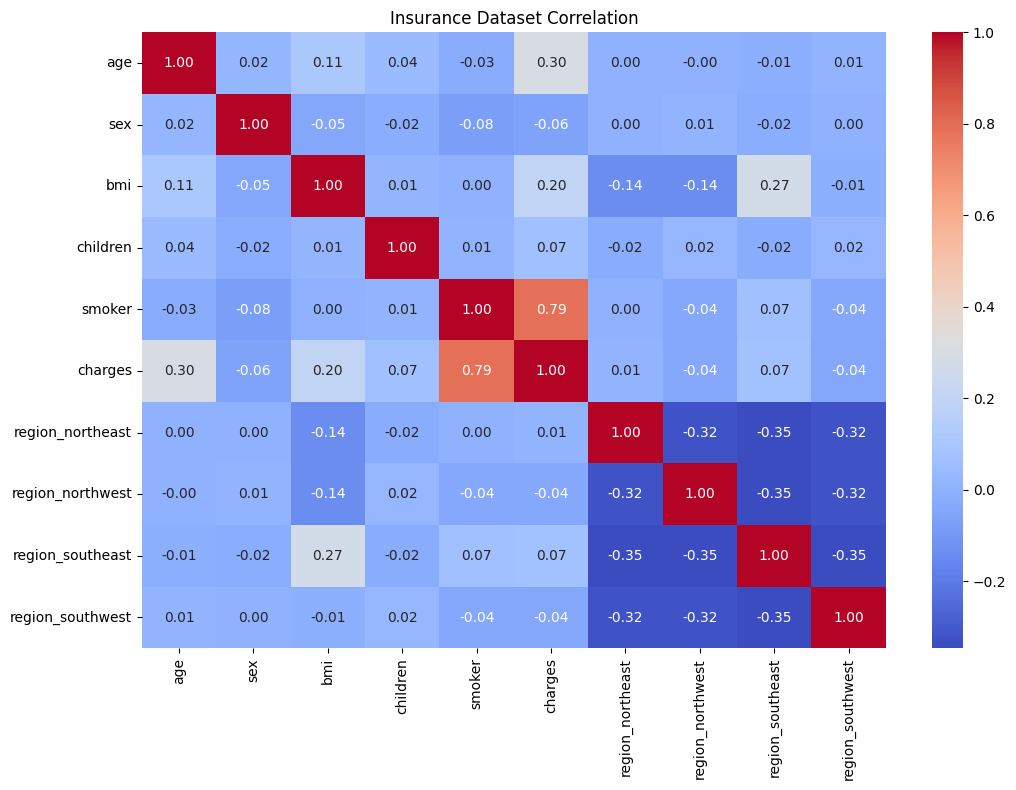

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Insurance Dataset Correlation")
plt.show()

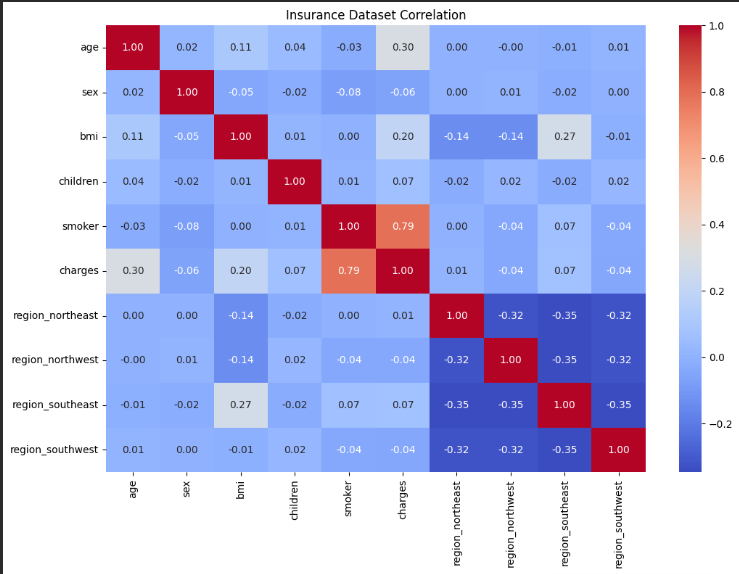

The heatmap correlation showed that smoking status have the strongest positive correlation with insurance charges, with the correlation being 0.79.

##**Key Findings & Insights**

From the plots and distributions, we can see the relationships between smoking status, insurance charges and other features. Overall, it is clear that smokers consistently incur higher insurance charges than non-smokers even with factors such as age, BMI, sex, etc.

##**Hypothesis**

**Hypothesis 1:**

H₀ (Null): Smoking has no significant effect on insurance charges.

H₁ (Alternative): Smokers have significantly higher insurance charges than non-smokers.

In [13]:
smoker = data.loc[data.smoker=="yes"]
smoker_charges = smoker.charges
smoker_mean = smoker_charges.mean()
smoker_mean

np.float64(32050.23183153284)

Mean value of people who smokes

In [14]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_charges = nonsmoker.charges
nonsmoker_mean = nonsmoker_charges.mean()
nonsmoker_mean

np.float64(8434.268297856204)

Mean value of people who don't smoke

Boxplot for smokers vs. non-smokers

[Text(0.5, 1.0, 'Smoker vs Charges')]

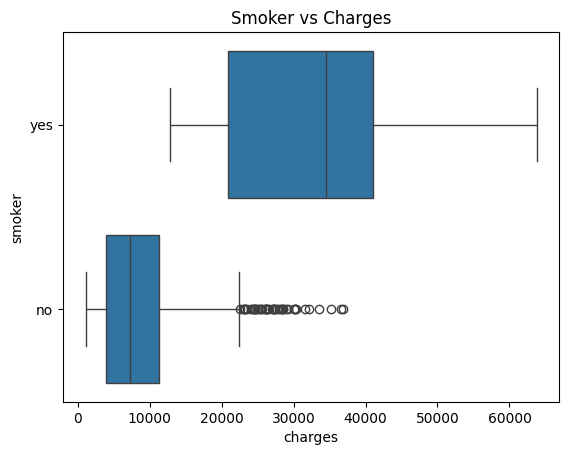

In [15]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Smoker vs Charges")

In [16]:
alpha=0.05
t_value, p_value = stats.ttest_ind(smoker_charges, nonsmoker_charges)
p_value_onetail=p_value/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_value, p_value, p_value_onetail))

t_value = 46.66492117272371 , p_value =8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283


t-value and p-value of charges for smokers and non-smokers:

t value = 46.66492117272371

p value = 8.271435842179102e-283

p value onetail = 4.135717921089551e-283

***Conclusion:***

p value is less than alpha(which is 0.05), reject null hypothesis. In conclusion, smokers have significantly higher insurance than non-smokers.



---



**Hypothesis 2:**

H₀ (Null): BMI has no effect on insurance charges.

H₁ (Alternative): Smokers with higher BMI have higher charges than smokers with lower BMI and non-smokers.

In [24]:
#separate low bmi and high bmi by using median
median_bmi = new_data['bmi'].median()
new_data['bmi_group'] = new_data['bmi'].apply(lambda x: 'low_bmi' if x < median_bmi else 'high_bmi')

In [25]:
new_data['bmi_group'].value_counts()

,count
bmi_group,
high_bmi,670
low_bmi,668


In [26]:
smokers = new_data[new_data['smoker'] == 1]

smokers_low_bmi = smokers[smokers['bmi_group'] == 'low_bmi']
smokers_high_bmi = smokers[smokers['bmi_group'] == 'high_bmi']

smokers_low_bmi, smokers_high_bmi


(      age  sex     bmi  children  smoker      charges  region_northeast  \
 0      19    1  27.900         0       1  16884.92400             False   
 11     62    1  26.290         0       1  27808.72510             False   
 52     48    0  28.000         1       1  23568.27200             False   
 58     53    1  22.880         1       1  23244.79020             False   
 64     20    1  22.420         0       1  14711.74380             False   
 ...   ...  ...     ...       ...     ...          ...               ...   
 1307   32    0  28.120         4       1  21472.47880             False   
 1308   25    1  30.200         0       1  33900.65300             False   
 1314   30    1  23.655         3       1  18765.87545             False   
 1321   62    0  26.695         0       1  28101.33305              True   
 1337   61    1  29.070         0       1  29141.36030             False   
 
       region_northwest  region_southeast  region_southwest bmi_group  
 0            

Divide BMI into different categories

In [27]:
smokers_low_bmi_mean = smokers_low_bmi['charges'].mean()
smokers_high_bmi_mean = smokers_high_bmi['charges'].mean()

smokers_low_bmi_mean, smokers_high_bmi_mean


(np.float64(22230.07990110294), np.float64(41728.06271949275))

In [29]:
alpha=0.05
t_value, p_value = stats.ttest_ind(smokers_high_bmi['charges'], smokers_low_bmi['charges'])
p_value_onetail=p_value/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_value, p_value, p_value_onetail))

t_value = 26.191334377053725 , p_value =2.4698879429560667e-76 , p_value_onetail = 1.2349439714780334e-76


t and p value of charges of smokers with high bmi and low bmi:

t value = 26.191334377053725

p value = 2.4698879429560667e-76

p value onetail = 1.2349439714780334e-76

***Conclusion:***

p value is less than alpha, reject null hypothesis. In conclusion, smokers with higher BMI have higher charges than smokers with lower BMI and non-smokers.



---



**Hypothesis 3:**

H₀ (Null): Smokers who have children doesn't have an affect on insurance charges.

H₁ (Alternative): Having children significantly affect insurance charges. Smokers who have children have significantly higher insurance charges than smokers with no children

Divide between smokers with children and no children

In [32]:
smokers = new_data['smoker'] == 1

#Smokers with children
have_children_smokers = new_data[(new_data['children'] >= 1) & smokers]

#Smokers with no children
no_children_smokers = new_data[(new_data['children'] == 0) & smokers]

have_children_smokers, no_children_smokers

(      age  sex     bmi  children  smoker      charges  region_northeast  \
 23     34    1  31.920         1       1  37701.87680              True   
 29     31    0  36.300         2       1  38711.00000             False   
 34     28    0  36.400         1       1  51194.55914             False   
 38     35    0  36.670         1       1  39774.27630              True   
 49     36    0  35.200         1       1  38709.17600             False   
 ...   ...  ...     ...       ...     ...          ...               ...   
 1304   42    0  24.605         2       1  21259.37795              True   
 1307   32    0  28.120         4       1  21472.47880             False   
 1313   19    1  34.700         2       1  36397.57600             False   
 1314   30    1  23.655         3       1  18765.87545             False   
 1323   42    1  40.370         2       1  43896.37630             False   
 
       region_northwest  region_southeast  region_southwest bmi_group  
 23           

In [33]:
children_mean = have_children_smokers['charges'].mean()
no_children_mean = no_children_smokers['charges'].mean()

children_mean, no_children_mean

(np.float64(32562.935013647806), np.float64(31341.363953652173))

In [34]:
alpha=0.05
t_value, p_value = stats.ttest_ind(have_children_smokers['charges'], no_children_smokers['charges'])
p_value_onetail=p_value/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_value, p_value, p_value_onetail))

t_value = 0.8642223180905935 , p_value =0.3882272545569202 , p_value_onetail = 0.1941136272784601


t and p value of smokers with children and no children

t value =  0.8642223180905935

p value = 0.3882272545569202

p value onetail = 0.1941136272784601

***Conclusion:***

p value is greater than alpha value, failed to reject null hypothesis. In conclusion, smokers who have children doesn't have an affect on insurance charges.



---



##**Conclusion & Next Steps**

The analysis of this dataset provides insights about factors that affect insurance charges. It shows that smoking is the strongest predictor of higher charges with smokers paying significantly more than non-smokers. Additionally, other factors such as BMI also affect insurance charges, with smokers who have higher BMI have higher insurance costs. Unexpectedly, having dependents doesn't affect insurance charges. This indicates that individual lifestyle choices and health factors are more influential in determining insurance costs. Moving forward, this analysis can be further imporved by using regression models, segmentation and adding other variables to explore more correlations and provide more insights.